In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')
drive_path = '/content/gdrive/My Drive/'

Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
data = pd.read_excel(drive_path + "imdb_processeddata.xlsx")
data = data[['Review_Content','Review_Sentiment']]
data.head()


,Review_Content,Review_Sentiment
0,shawshank redempt written direct frank darabon...,Positive
1,wonder high rate quit liter breathtak say hasn...,Positive
2,im tri save money last titl consid borrow rent...,Positive
3,ordinari hollywood flick great deep messag fou...,Positive
4,oscar year shawshank redempt written direct fr...,Positive


In [4]:
positive_string = ""
neutral_string = ""
negative_string = ""

for i,j in enumerate(data['Review_Content']):
  if data['Review_Sentiment'][i] == 'Positive':
    positive_string += j + " "
  elif data['Review_Sentiment'][i] == 'Negative':
    negative_string += j + " "
  else:
    neutral_string += j + " "

print(positive_string)
print(neutral_string)
print(negative_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



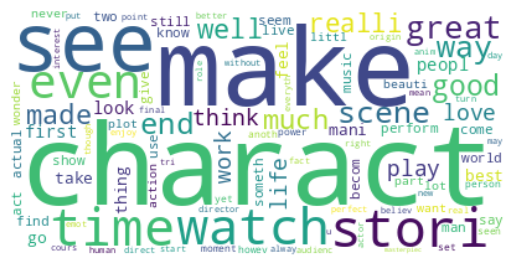

In [5]:
wc = WordCloud(max_words=100, background_color="white").generate(positive_string)

plt.figure()
plt.imshow(wc, interpolation="bilinear",)
plt.axis("off")
plt.show()

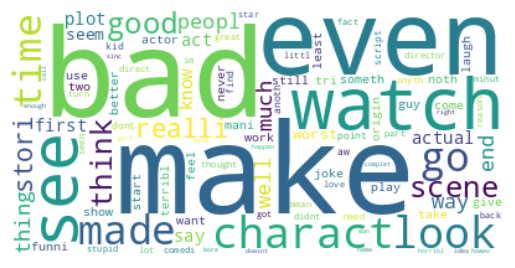

In [6]:
wc = WordCloud(max_words=100, background_color="white").generate(negative_string)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

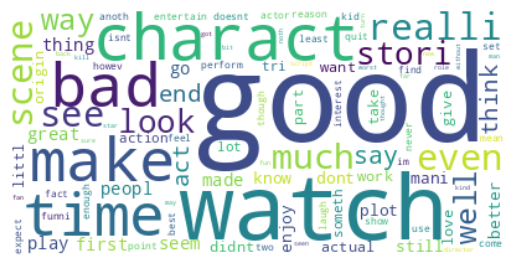

In [7]:
wc = WordCloud(max_words=100, background_color="white").generate(neutral_string)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
positive_data = data[data['Review_Sentiment']=='Positive']
negative_data = data[data['Review_Sentiment']=='Negative']
neutral_data = data[data['Review_Sentiment']=='Neutral']

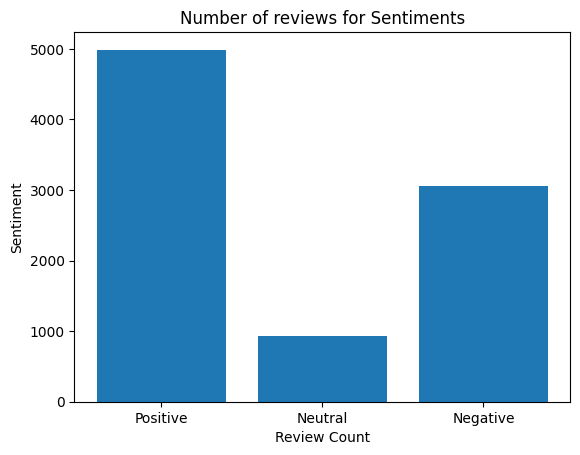

In [9]:
positive_count = positive_data['Review_Sentiment'].count()
negative_count = negative_data['Review_Sentiment'].count()
neutral_count = neutral_data['Review_Sentiment'].count()

k = ['Positive', 'Neutral', 'Negative']
to_plot = [positive_count, neutral_count, negative_count]

plt.bar(k,to_plot)
plt.xlabel('Review Count')
plt.ylabel('Sentiment')
plt.title('Number of reviews for Sentiments')
plt.show()